In [2]:
import pandas as pd
import numpy as np
import warnings
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime as dat, timedelta
from pandas import datetime
from dateutil.relativedelta import relativedelta
import datetime
import warnings
from pandas import Series
from math import sqrt
import statsmodels.api as sm
from pmdarima.arima import auto_arima
import xlrd
#from pandas_ods_reader import read_ods

In [3]:
df=pd.read_excel('/home/rupeshr/fore_data.xlsx')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df['price'] = df['price'].fillna(0)
df['origin_curr'] = df['origin_curr'].fillna(0)
df['delivery_curr'] = df['delivery_curr'].fillna(0)
df['CusUniAgreement'] = df['CusUniAgreement'].fillna(0)
df['EmpContNo_origin'] = df['EmpContNo_origin'].fillna(0)
df['EmpContNo_delivery'] = df['EmpContNo_delivery'].fillna(0)
df.isnull().sum()

year                  0
week                  0
servicecode           0
vesselcode            0
voyage                0
bound                 0
originPort            0
deliveryPort          0
twenty                0
forty                 0
holiday_origin        0
holiday_delivery      0
total_allocation      0
portPair              0
date                  0
origin_code           0
delivery_code         0
price                 0
origin_curr           0
delivery_curr         0
CusUniAgreement       0
EmpContNo_origin      0
EmpContNo_delivery    0
dtype: int64

In [20]:
portpair=[i for i in df['portPair'].unique()]
var=df['portPair'].value_counts()
var1=var[(var >200)]
var1=pd.DataFrame(var1)
var1.reset_index(level=0,inplace=True)
var1.columns=['portPair','count']
var1.head(10)

,portPair,count
0,CNTAO-TZDAR,633
1,CNNGB-TZDAR,606
2,CNNGB-KEMBA,604
3,CNSHA-TZDAR,602
4,CNTAO-KEMBA,592
5,CNSHA-KEMBA,567
6,CNNGB-TZZNZ,534
7,CNXNG-AEJEA,496
8,CNNGB-INNSA,455
9,INTKD-AEJEA,453


In [38]:
portdata=df[(df.portPair=='CNTAO-KEMBA')]
portdata=portdata.groupby(['date','portPair','holiday_origin','holiday_delivery','price','origin_curr','delivery_curr','CusUniAgreement','EmpContNo_origin','EmpContNo_delivery'])['twenty','forty'].sum().reset_index()
portdata=portdata.drop(['portPair','forty'],axis=1)
portdata.corr()
#portdata.corr(method='spearman')
#portdata.corr(method='kendall')

/home/rupeshr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,holiday_origin,holiday_delivery,price,origin_curr,delivery_curr,CusUniAgreement,EmpContNo_origin,EmpContNo_delivery,twenty
holiday_origin,1.000000,0.032305,0.057932,0.037932,0.022648,-0.125608,-0.043608,-0.004463,-0.093499
holiday_delivery,0.032305,1.000000,-0.034391,0.019602,0.035526,0.035633,0.027588,-0.049571,-0.044229
price,0.057932,-0.034391,1.000000,0.159314,0.049475,-0.227968,-0.253076,-0.207437,-0.341586
origin_curr,0.037932,0.019602,0.159314,1.000000,0.909490,0.053951,0.110581,-0.086210,-0.040413
delivery_curr,0.022648,0.035526,0.049475,0.909490,1.000000,0.161737,0.085385,0.073824,0.098957
CusUniAgreement,-0.125608,0.035633,-0.227968,0.053951,0.161737,1.000000,-0.005590,0.393542,0.344331
EmpContNo_origin,-0.043608,0.027588,-0.253076,0.110581,0.085385,-0.005590,1.000000,0.074171,0.109600
EmpContNo_delivery,-0.004463,-0.049571,-0.207437,-0.086210,0.073824,0.393542,0.074171,1.000000,0.387243
twenty,-0.093499,-0.044229,-0.341586,-0.040413,0.098957,0.344331,0.109600,0.387243,1.000000


/home/rupeshr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


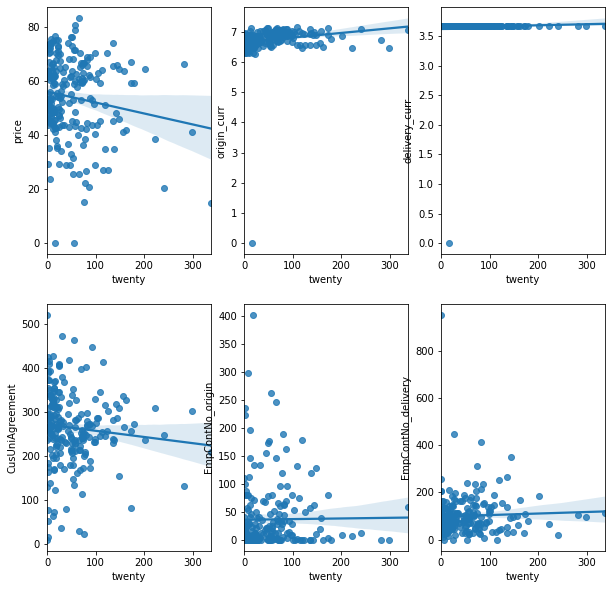

In [29]:
portdata=df[(df.portPair=='CNXNG-AEJEA')]
portdata=portdata.groupby(['date','portPair','holiday_origin','holiday_delivery','price','origin_curr','delivery_curr','CusUniAgreement','EmpContNo_origin','EmpContNo_delivery'])['twenty','forty'].sum().reset_index()
portdata=portdata.drop(['portPair','forty'],axis=1)
#portdata=portdata.set_index('date')
fig,ax=plt.subplots(2,3,figsize=(10,10))
sns.regplot(data=portdata, x="twenty", y="price",ax=ax[0,0])
sns.regplot(data=portdata, x="twenty", y="origin_curr",ax=ax[0,1])
sns.regplot(data=portdata, x="twenty", y="delivery_curr",ax=ax[0,2])
sns.regplot(data=portdata, x="twenty", y='CusUniAgreement',ax=ax[1,0])
sns.regplot(data=portdata, x="twenty", y='EmpContNo_origin',ax=ax[1,1])
sns.regplot(data=portdata, x="twenty", y='EmpContNo_delivery',ax=ax[1,2])

In [25]:
portdata.corr()

,holiday_origin,holiday_delivery,price,origin_curr,delivery_curr,CusUniAgreement,EmpContNo_origin,EmpContNo_delivery,twenty
holiday_origin,1.000000,0.162458,0.037798,0.061680,0.030556,-0.117909,0.149287,-0.071427,0.119081
holiday_delivery,0.162458,1.000000,0.002881,0.022037,0.029819,-0.017529,-0.002040,0.042297,0.079728
price,0.037798,0.002881,1.000000,0.200791,0.244623,-0.267912,-0.232028,-0.069264,-0.151688
origin_curr,0.061680,0.022037,0.200791,1.000000,0.905099,0.055771,0.108869,-0.034562,0.169389
delivery_curr,0.030556,0.029819,0.244623,0.905099,1.000000,0.112904,0.023971,-0.082995,0.042308
CusUniAgreement,-0.117909,-0.017529,-0.267912,0.055771,0.112904,1.000000,0.084758,0.057251,-0.091685
EmpContNo_origin,0.149287,-0.002040,-0.232028,0.108869,0.023971,0.084758,1.000000,0.114924,0.010837
EmpContNo_delivery,-0.071427,0.042297,-0.069264,-0.034562,-0.082995,0.057251,0.114924,1.000000,0.041067
twenty,0.119081,0.079728,-0.151688,0.169389,0.042308,-0.091685,0.010837,0.041067,1.000000
